# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  


## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [71]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [72]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [73]:
# random_choice = [int(i) for i in np.floor(np.random.random(3)*100)]

I was going to set the indices with random numbers but decided against it as they would change everytime I ran the cell. 

In [74]:
# Select three indices of your choice you wish to sample from the dataset
indices = [10, 62, 101]

# Create a DataFrame of the chosen samples. Give data.loc[] a list of row 
# numbers. For columns we give it the names of the columns in data. 
# reset_index() gives the rows in the new dataframe sequential numbers from 0.
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,7823,6245,6544,4154,4074,964
2,1420,10810,16267,1593,6766,1838


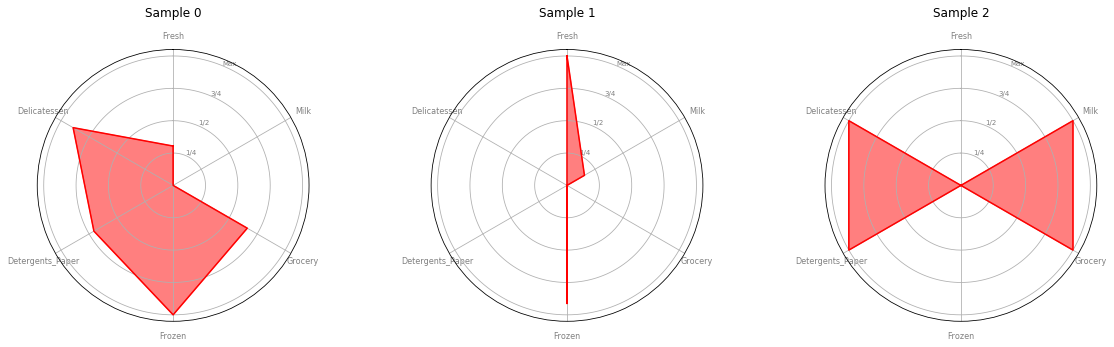

In [75]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

scaler = MinMaxScaler()
df = np.round(samples, 1)
index  = df.index[:]
categories = list(df)
df = scaler.fit_transform(df)*100
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(20, 5))
def Radar(index, title, color):
    ax = plt.subplot(1, 3, index+1, polar=True)
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color ='grey', size = 8)
    plt.yticks((25, 50, 75, 100), ("1/4", "1/2", "3/4", "Max"), color = "grey", size = 7)
    values = df[index]
    values = np.append(values, values[:1])
    ax.plot(angles, values, color = color)
    ax.fill(angles, values, color=color, alpha=0.5)
    plt.title('Sample {}'.format(title), y= 1.1)

for i, n in enumerate(index):
    Radar(index=i, title=n, color='r')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

What kind of establishment (customer) could each of the three samples you've chosen represent?

Means for dataset:
* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**  
Compared to the averages for the entire data set, all three of our customers purchase a lot less fresh items than is typical, while they purchase items from the other categories in amounts more or less in line with the averages for the whole data set. This might mean that these customers are not restaurants.  

Comparing customers 0 and 1 with one another, we see that 1 purchases twice as much fresh items as 0, while 0 purchases about half as many grocery and delicatessen items as 1. That suggests that 1 is a restaurant that makes a high proportion of its dishes from raw ingredients, perhaps, and which suggests that this customer would also be the kind that would be very intolerant of any delays in delivery.  

Case 2 (the third customer) represents another configuration. This customer purchases a strikingly large amount of milk and but a very small amount of fresh items. It suggests a convenience store where people don't buy raw ingredients to take home and prepare but instead buy things that they run out of (milk). Perhaps it is a gas-station grocery store? I might be more tolerant of less timely deliveries except in a key category like milk. It would possibly accept longer delivery times as long as quicker deliveries were scheduled for a few highly perishable and high turn-over items. But all this is speculation. 

To visually compare the three customers I created radar plots of the three customers. This plots each of the six dimenions of variation on a different axis of the circle with the maximum, minimum, and the proportional medium on the axes. It is designed to maximize the contrast between the cases. As we can see, the 2nd and 3rd cases (samples 1 and 2) have the maximum values on fresh-frozen and delicatessen-detergents_paper-grocery-milk respectively. The first case, sample 0, has the intermediate values on all dimensions but milk, where it has the minimum value of the three cases.  

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [76]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(labels='Detergents_Paper', axis=1)

In [77]:
new_data.shape

(440, 5)

In [78]:
# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(new_data.values, data['Detergents_Paper'].values, test_size=0.25, random_state=seed)

In [79]:
# Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=seed)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [80]:
y_pred[:10]

array([3143.,  415., 4111.,  716.,  483., 1247., 1062., 3143.,  234.,
        200.])

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.27166698062685013

In [82]:
regressor.score(X_test, y_test)

0.27166698062685013

That seems like pretty poor performance and I wonder if by using grid search I could get a better result? 

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
params = {'criterion': ['mse', 'mae', 'friedman_mse'],
          'max_features': [2,3,4,5],
          'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
          'min_samples_split':[2,3,4,5,6,7,8,9,10]}

grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=seed), param_grid=params, cv=5, scoring='r2')

In [86]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['mse', 'mae', 'friedman_mse'], 'max_features': [2, 3, 4, 5], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [87]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [88]:
print(grid.best_score_)

0.764104910476534


I am not sure if the best_score_ attribute is actually R^2 and I don't know if that is the same thing that would be returned by the score method called on the regressor so I am, just to be on the safe side, rerun the decision tree regression and with the parameters found above and call the score method on the result. 

In [89]:
regressor = DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=5, min_samples_leaf=4, min_samples_split=2, random_state=seed)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(r2_score(y_test, y_pred))
print(regressor.score(X_test, y_test))

0.5785580178714494
0.5785580178714494


Ok, well, I am doing something wrong or the goal of this project is to teach us that Decision Tree Regression isn't a very good tool because this score of 0.58 is nowhere near the simple correlation scores I find below. There doesn't seem to be any way that a regression with 5 variables could fail to do at least as well as a bivariate corralation does with one of those variables. Just to satisfy myself, I am going to try this with linear regression. 

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
y_pred = reg.predict(X_test)

In [93]:
print(y_pred.shape)
print(y_test.shape)

(110,)
(110,)


In [94]:
print(r2_score(y_test, y_pred))
print(reg.score(X_test, y_test))

0.7022132848409466
0.7022132848409466


Ok, I admit it. I am officially confused. There are individual variables that correlate in the 90s but I am getting only 0.7 for the entire regression? A bivariate regression of 'Detergents_Paper' on 'Grocery' would do better, no? Is what this is telling me that the variables are too correlated? But surely that would increase the r^2. It would make the coefficients on the individual variables hard to interpret but that would not harm the r^2, right? One last thing I am going to try is do regressions on of Grocery and Milk on Detergent_Paper. I should get something at least as high as the correlations on these, no? 

In [95]:
#try it normalized
reg_norm = LinearRegression(normalize=True)
reg_norm.fit(X_train, y_train)
y_pred = reg_norm.predict(X_test)
print(r2_score(y_test, y_pred))
print(reg_norm.score(X_test, y_test))

0.7022132848409469
0.7022132848409469


In [96]:
data['Grocery'][:300].values.reshape(-1,1).shape

(300, 1)

In [97]:
reg.fit(data['Grocery'][:300].values.reshape(-1,1), data['Detergents_Paper'][:300].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
y_pred = reg.predict(data['Grocery'][300:].values.reshape(-1,1))

In [99]:
r2_score(data['Detergents_Paper'][300:].values.reshape(-1,1), y_pred)

0.8273613909839992

It is puzzling to me how the $r^2$ on the bi-variate regression can do worse than the correlation coefficient on the same two values. I thought that in the bi-variate case they were the same? 

Ok, so the $R^2$ does not equal Pearson's r, it equals the square of Pearson's r.

In [100]:
0.924641*0.924641

0.8549609788810001

Well, that is not too drastically larger than the r^2 I was getting out of the regression analyses but it is still not very good. It seems like the correlation should be the floor for the regression results.  

I assume that the difference here is that I am fitting a regression line to the training data and the calcuating my $r^2$ on the testing set. There are not that many cases so it is possible that the score on the testing set would be a good deal below what it would be on the training set. 

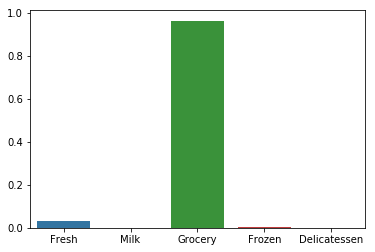

In [101]:
import seaborn as sns
sns.barplot(new_data.columns, regressor.feature_importances_)

Now I return to the original Decision Tree Regressor and calculate the feature importance. These feature importances are calculated according to the method laid out in Breiman, Friedman, "Classification and regression trees", 1984.

So it looks like from this plot we can pretty much predict detergents and paper from groceries. Indeed, the other features are of vanishingly small importance compared to it. So we should leave out detergents/paper since we can derive it from the grocery variable.  

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?


**Answer:**  
In my first attempt to estimate a DecisionTreeRegression, the other features were not able to predict detergents/paper orders very well, the coefficient of determination of just 0.272 suggesting that just over a quarter of the variance in money spent on Detergents and Paper can be explained by the amount spent on all other product categories. This suggests that spending on detergents and paper is an independent feature not well explained or highly correlated to other features and should not, consequently, be dropped from the data set.  

But, this struck me as being rather low and I thought that a Decision Tree Regression may do better with other parameters. I ran a grid search and found that a model that gave me an $R^2$ of 0.76, implying that 3 quarters of the variation in purchases of detergents and paper could be explained by purchases of groceries. Moreover, when I ran feature importances I found that the importance of groceries in explaining detergent and paper purchases was overwhelming, driving the importances of other features to insignificance.   

So, I will probably leave detergents and paper out of subsequent analyses. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

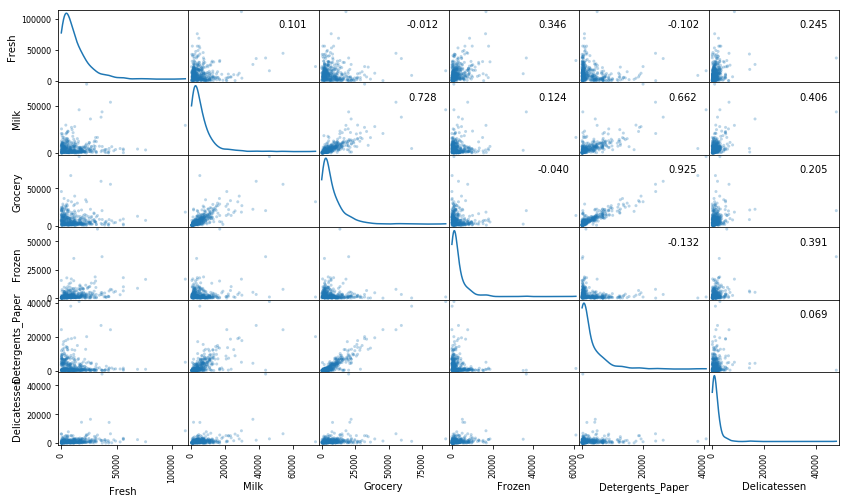

In [102]:
axes = pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().values
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], 
                        (0.8, 0.8), xycoords='axes fraction', 
                        ha='center', va='center')

In [103]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?


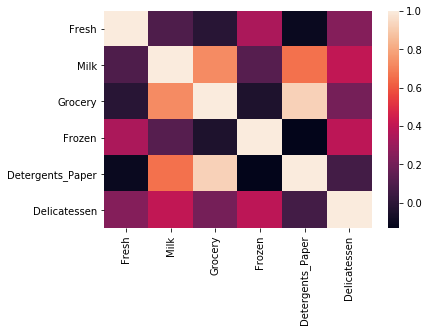

In [104]:
import seaborn as sns
from seaborn import heatmap
sns.heatmap(data.corr())

**Answer:**  
The scatter matrix and the heatmap pictured above confirm the case for leaving out detergents and paper products on the ground that their sales can be predicted from the sales of groceries. Both fresh foods and groceries are right skewed, as is seen from visually inspecting the KED plots on the diagonal of the scatter matrix, but only groceries exhibits a strong correlation with another variable-detergents and paper sales. 

The heatmap leaves little doubt that the Detergents_Paper and Grocery categories are highly correlated. They are the only categories that are peach colored like the variables correlated on themselves are. So, I am going to drop detergents and paper from the data set. 

In [105]:
data = data.drop(labels='Detergents_Paper', axis=1)
samples = samples.drop(labels='Detergents_Paper', axis=1)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.


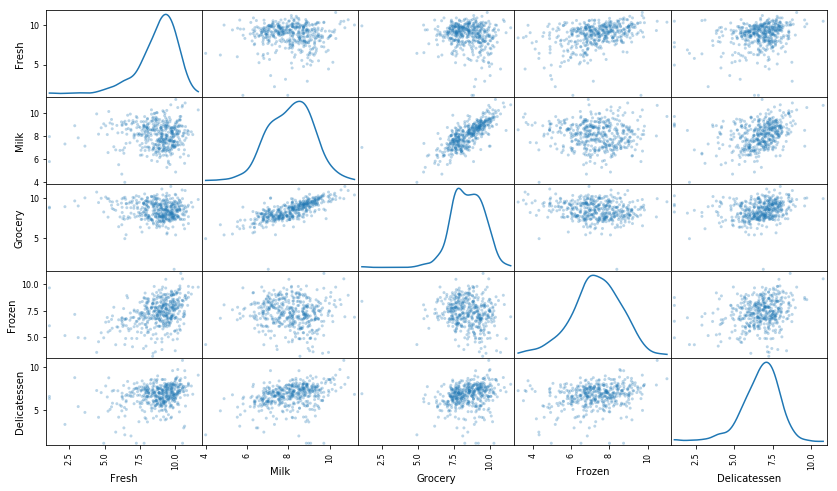

In [106]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [107]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Delicatessen
0,8.121480,8.594710,9.470703,8.389360,7.463937
1,8.964823,8.739536,8.786304,8.331827,6.871091
2,7.258412,9.288227,9.696894,7.373374,7.516433


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.


In [108]:
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612
25%,8.048059,7.334981,7.674616,6.609678,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.872645
75%,9.737064,8.880480,9.273854,8.175896,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.777768


In [109]:
log_data.Grocery.head()

0    8.930759
1    9.166179
2    8.946896
3    8.347827
4    8.881558
Name: Grocery, dtype: float64

In [110]:
np.percentile(log_data['Grocery'], 75)

9.27385367723784

In [111]:
from collections import Counter
c = Counter()
#For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    for i in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values:
        c[i] += 1

    

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,7.260523
66,2.197225,7.335634,8.911530,5.164786,3.295837
81,5.389072,9.163249,9.575192,5.645447,5.049856
95,1.098612,7.979339,8.740657,6.086775,6.563856
96,3.135494,7.869402,9.001839,4.976734,5.379897
128,4.941642,9.087834,8.248791,4.955827,1.098612
171,5.298317,10.160530,9.894245,6.478510,8.740337
193,5.192957,8.156223,9.917982,6.865891,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.759669
304,5.081404,8.917311,10.117510,6.424869,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.882802
154,6.432940,4.007333,4.919981,4.317488,2.079442
356,10.029503,4.897840,5.384495,8.057377,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,6.882437
154,6.432940,4.007333,4.919981,4.317488,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,6.070738
57,8.597297,9.203618,9.257892,3.637586,7.156177
65,4.442651,9.950323,10.732651,3.583519,7.260523
145,10.000569,9.034080,10.457143,3.737670,8.396155
175,7.759187,8.967632,9.382106,3.951244,7.436617
264,6.978214,9.177714,9.645041,4.110874,7.142827
325,10.395650,9.728181,9.519735,11.016479,8.632128
420,8.402007,8.569026,9.490015,3.218876,7.239215
429,9.060331,7.467371,8.183118,3.850148,7.824446
439,7.932721,7.437206,7.828038,4.174387,3.951244


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,3.295837
109,7.248504,9.724899,10.274568,6.511745,1.098612
128,4.941642,9.087834,8.248791,4.955827,1.098612
137,8.034955,8.997147,9.021840,6.493754,3.583519
142,10.519646,8.875147,9.018332,8.004700,1.098612
154,6.432940,4.007333,4.919981,4.317488,2.079442
183,10.514529,10.690808,9.911952,10.505999,10.777768
184,5.789960,6.822197,8.457443,4.304065,2.397895
187,7.798933,8.987447,9.192075,8.743372,1.098612
203,6.368187,6.529419,7.703459,6.150603,2.890372


In [112]:
len(log_data)

440

After inspection I decide to programatically remove cases that are outliers on 2 or more dimensions.

In [113]:
# Select the indices for data points to remove
outliers = []
for key, val in c.items():
    if val > 1:
        outliers.append(key)
print(outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

[65, 66, 128, 154]


In [114]:
len(good_data)

436

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.


**Answer:**  
The importance of removing outliers in K-means is based on the fact that it is a distance based algorithm. In particular, as the algorithm is based on euclidean distance outliers could give a feature far more importance than it deserves.  

I removed cases 65, 66, 128, and 154 because they were outliers in 2 or more dimensions. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.


In [115]:
good_data.shape[1]

5

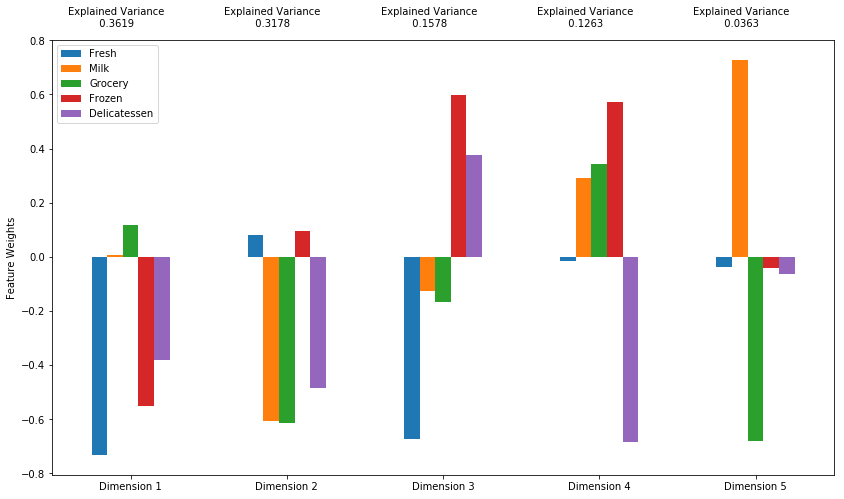

In [116]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA()
pca = pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.


**Answer:**  
The first and second components together explain 68% of the data. Adding in the next two components brings the total variance explained up to over 96%.  

The first dimension of variance captures how little the customer spends on fresh and frozen goods and, to a lesser extent, delicatessen.   

The second dimension represents how little a customer spends on the grocery and milk categories. 

The third dimension seems to represent an underlying variable that captures customers who buy frozen goods as opposed to fresh goods. 

The fourth dimension appears to represent how much consumers don't buy delicatessen goods as opposed to the other categories. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [117]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
0,-0.2830,-1.2401,1.1326,0.5780,-0.4245
1,-0.7204,-0.5571,0.4024,0.7469,0.1550
2,0.9188,-1.9930,1.0011,0.2524,-0.0035


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [118]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca = pca.fit(good_data)

In [119]:
# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [120]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.2830,-1.2401
1,-0.7204,-0.5571
2,0.9188,-1.9930


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

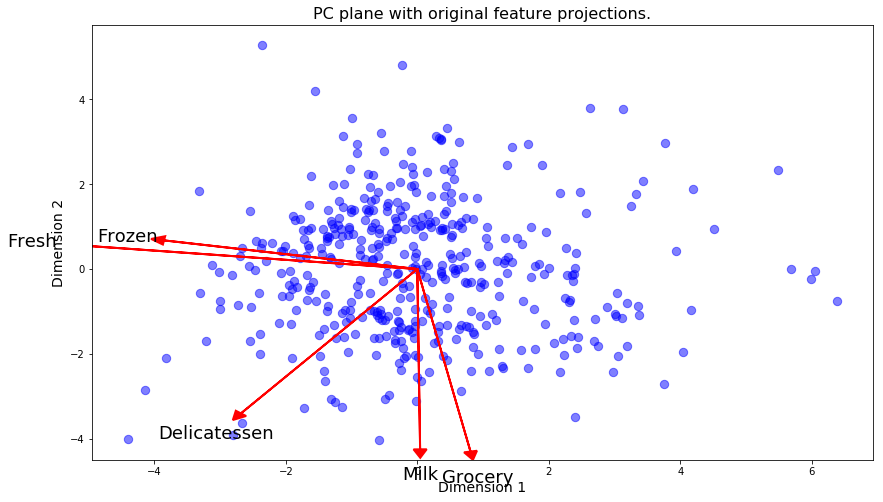

In [121]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point in the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?


**Answer:**  
The k-means and the guassian mixture model are unsupervised machine learning procedures that find groups in data, but they go about this in slightly different ways. The k-means algorithm treats distance in any direction as being equally important. The Gaussian Mixture Model infers different distributions as being latent in the data and finds some directions being more important than others depending on the distributions it has inferred. The K-means algorithm finds spherical distributions while the Gaussian can find distributions of elipses of different sizes and orientations.  

Visual inspection of our data does not reveal any sort of latent elipses as one would expect in data generated by two differently shaped distributions. The log transformations showed the six different variables to be log-normal as well and, given that the K-Means algorithm is the simpler algorithm and is much faster, I will proceed using it and only going to the GMM if the results are unsatisfactory. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [122]:
from sklearn.cluster import KMeans
# Apply clustering algorithm to the reduced data 
clusterer = KMeans(n_clusters=2)
clusterer = clusterer.fit(reduced_data)

In [123]:
# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

In [124]:
from sklearn.metrics import silhouette_score
# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

In [125]:
print(score)

0.33589631566848654


Now I am going to create a loop that will go through and get me the scores for a lot of different numbers of clusters. 

In [126]:
num_clusters_lst = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
silhouette_scores = []

for i in num_clusters_lst:
    
    clusterer = KMeans(n_clusters=i)
    clusterer = clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    silhouette_scores.append(score)
    
print(silhouette_scores)
    

[0.3358384830110449, 0.3772115820763021, 0.3492325720911829, 0.34285315161994856, 0.353067797661277, 0.3549683145416158, 0.36085550100679886, 0.3681695572229154, 0.3507617967111873, 0.334806770330488, 0.3552474782421206, 0.35841356726219503, 0.3402276217627622, 0.35558088806524885, 0.355662611615964, 0.3430828973695966, 0.35536184079254823, 0.3393590130419395, 0.35167180038100965]


In [127]:
# true_centers = true_centers.append(data.describe().loc['mean'])
# true_centers.plot(kind = 'bar', figsize = (16, 4))

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

*Here I am going to make a line plot of the silhouette scores in hope of seeing the elbow that we are supposed to be looking for.*

In [128]:
sil = list(zip(num_clusters_lst,silhouette_scores))

In [129]:
import matplotlib as plt
import seaborn as sns

In [130]:
silhouette_df = pd.DataFrame(sil, columns=['groups','silhouette_scr'])

In [131]:
silhouette_df

,groups,silhouette_scr
0,2,0.335838
1,3,0.377212
2,4,0.349233
3,5,0.342853
4,6,0.353068
5,7,0.354968
6,8,0.360856
7,9,0.368170
8,10,0.350762
9,11,0.334807


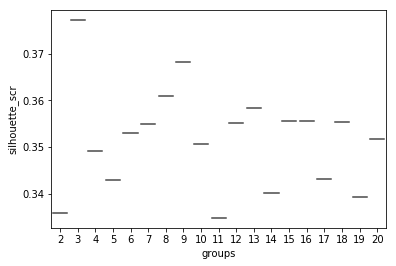

In [132]:
sns.lvplot(data=silhouette_df, x='groups',y='silhouette_scr')

**Answer:**  
The best silhouette score was the first one calculated, 2. So the best clustering for this data appears to be 2 groups. One thing that is slightly concerning is that the scores jump around quite a bit. The scores in the lessons did so as well, but now that I see it with my own data I find it rather disconcerting. It seems like the more groups you can put points into the better the fit should be, kind of like regression where, even if a variable is useless, putting it in the regression still gives you some improvement in the $R^2$. Anyway, this analysis strongly supports the decision to make 2 groups. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

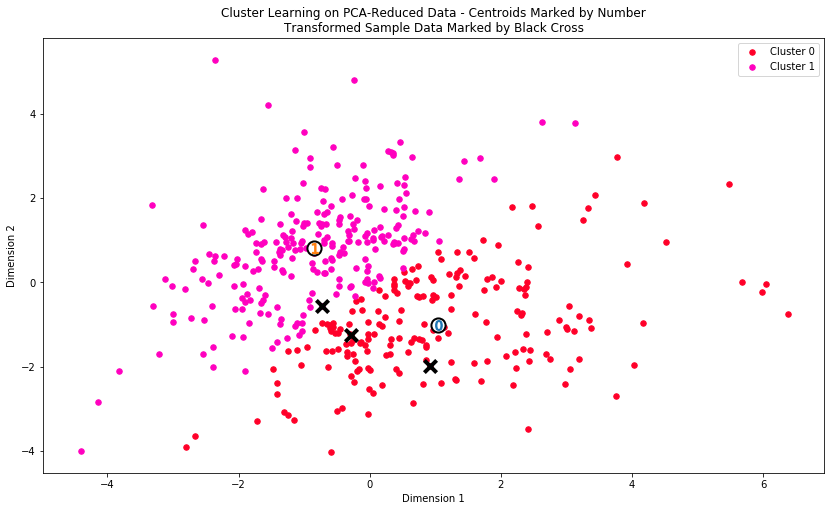

In [133]:
clusterer = KMeans(n_clusters=2)
clusterer = clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.


In [134]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

In [135]:
# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Delicatessen
Segment 0,2769.0,6259.0,9709.0,778.0,883.0
Segment 1,12809.0,2045.0,2543.0,2629.0,752.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?


**Answer:**

We have two customer segments characterized by their purchases in 6 product categories, Fresh, Milk, Grocery, Frozen, Detergents-Paper, and Delicatessen. The differences tend to be pronounce. For example,Customers in segment 0 buy about 4 times as much Milk and Grocery good as customers in segment 1, as much as 16 times as much Detergents and Paper products. They also buy about 50% more in the Delicatessen category. Segment 1 customer buy about twice as much Fresh and Frozen goods.  

Looking at this list it seems that the more likely underlying division is between businesses that sell food as supplies and businesses that sell food as a prepared product, or, put simply, between grocery stores and restaurants. 

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [136]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("\nSample point", i, "predicted to be in Cluster", pred)
    print('The distance between sample point {} and center of cluster {}:\n'.format(i, pred))
    print((samples.iloc[i] - true_centers.iloc[pred]))


Sample point 0 predicted to be in Cluster 0
The distance between sample point 0 and center of cluster 0:

Fresh            597.0
Milk            -856.0
Grocery         3265.0
Frozen          3622.0
Delicatessen     861.0
dtype: float64

Sample point 1 predicted to be in Cluster 1
The distance between sample point 1 and center of cluster 1:

Fresh          -4986.0
Milk            4200.0
Grocery         4001.0
Frozen          1525.0
Delicatessen     212.0
dtype: float64

Sample point 2 predicted to be in Cluster 0
The distance between sample point 2 and center of cluster 0:

Fresh          -1349.0
Milk            4551.0
Grocery         6558.0
Frozen           815.0
Delicatessen     955.0
dtype: float64


In [137]:
display(true_centers)
display(samples)

,Fresh,Milk,Grocery,Frozen,Delicatessen
Segment 0,2769.0,6259.0,9709.0,778.0,883.0
Segment 1,12809.0,2045.0,2543.0,2629.0,752.0


,Fresh,Milk,Grocery,Frozen,Delicatessen
0,3366,5403,12974,4400,1744
1,7823,6245,6544,4154,964
2,1420,10810,16267,1593,1838


**Answer:**  
All of my sample points were in predicted to cluster 1 or, as we referred to it above, Segement 1, the group we designated as being grocery stores. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**  

An A/B test could help elucidate which customers are the most time sensitive. Categories of products like Milk and Fresh foods may be ones which customers are willing to pay more for shorter delivery times while others, such at Detergents and Paper products (what were once called 'dry goods') or Frozen foods may be ones where customers are more willing to allow greater lags between order and delivery.   

In our two broad categories of restaurants and groceries it seems likely that the restaurants would be more interested in having products delivered in a shorter period of time. 

We could implement an A/B test with treatment group getting slower delivery times for the groceries but maintaining them for the restaurants and the control maintaining faster delivery times for both categories. The null hypothesis would be that customer dissatisfaction and complaints would be the same for both groups. In this case, if the null hypothesis were proven to be true it would mean that the policy of slower deliveries could be implemented without fear of it cutting into sales. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?


**Answer:**  

We could train a supervised learning algorithm to classify new customers into our 'grocery' and 'restaurant' categores based on their prespective purchasing estimates. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

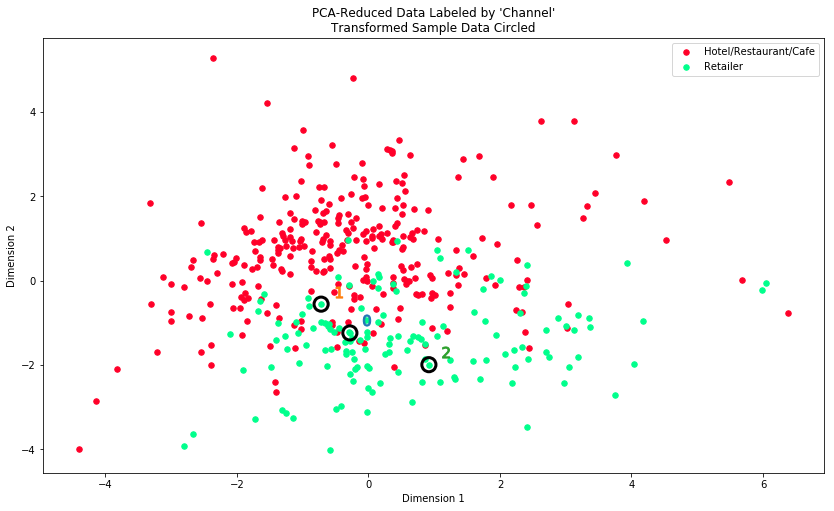

In [138]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

In [139]:
#find percentage of correctly classified customers
data = pd.read_csv("customers.csv")
data = data.drop(data.index[outliers]).reset_index(drop = True)
# might need to switch around the 0 and 1, based on your cluster seed
df = np.where(data['Channel'] == 2, 1, 0)
print("Percentage of correctly classified customers: {:.2%}".format(sum(df == preds)/float(len(preds))))

Percentage of correctly classified customers: 22.71%


**Answer:**  

The two categories found by K-means clustering, and which we decided to call 'restaurants' and 'groceries', coincide remarkably well with the Hotel/Restaurants/Cafes and Retailers categories as plotted on the first two dimensions found through PCA.  

The main difference between the clusters obtained by the unsupervised algorithm and the clusters defined by the observed categories 'Retailers' and 'Hotels/Restaurants/Cafes' is that many of the customers in the Hotels et al group stray into the 'territory' of the Retailers on the x axis, which represents the first principle component of the analysis. Because the first principle component represents ...... we would expect that there are a significant number of customers in the Hotels segment of our customers that might be tolerant of a greater lag time between orders and delivery. Conversely, the Retailers (what in the unsupervised category we called 'Groceries') are more neatly divided by the first pinciple component, with only a few customers mingling with the Hotels (what we called restaurants in the unsupervised model). All but four of the Retailes are above 0 on the first priciple component.  

This suggests that we should be should experiment with the Hotels (Restaurants) category and leave the Retailers (Groceries) in the more timely delivery service category. 

On the whole the observed categories line up quite well with the derrived categories.  


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.